# Area Analysis: Area Data

In [8]:
import numpy as np
import fiona
import pandas as pd
from shapely.geometry import Polygon, shape

rawMap = fiona.open('Data/Original_Data/Residences.shp')
# rawMap = fiona.open('Residences.shp')

In [5]:
# assort all the geoPy objects in the geoMap list
geoMap = []
for i in range(len(rawMap)):
    if rawMap[i]['geometry'] == None:
        print(i, 'is None')
    else:
        try:
            geoMap.append(Polygon(shape(rawMap[i]['geometry'])))
        except:
            print(i, 'has error')

2447 has error
2448 is None


In [ ]:
assert len(geoMap) == len(rsd_ctr) - 824 
assert len(geoMap) == len(house_label) and len(geoMap) == 2454

# dfArea is a DataFrame that contain the area of each building center point
dfArea = pd.DataFrame(columns = ['area', 'cluster'])
dfArea.area = [m.area for m in geoMap] + [25 for i in range(824)]
dfArea.cluster = full_label
assert len(dfArea) == len(geoMap) + 824

In [ ]:
area_to_export = np.asarray(dfArea.area)
np.savetxt("Area_3278.csv", area_to_export, delimiter=",")

## Adding cluster attribute and export

In [1]:
import numpy as np
import fiona
import pandas as pd
import json
import string

resMap = fiona.open('Data/Edit_rowNum/Residences/Residences.shp')
insubMap = fiona.open('Data/Edit_rowNum/insubs_Teo/Small_Features.shp')

assert len(resMap) == 2456
assert len(insubMap) == 824

In [3]:
totalMap = []

for i in resMap:
    totalMap.append(i)
for i in insubMap:
    totalMap.append(i)

for i in range(len(totalMap)):
    assert i == totalMap[i]["properties"]['Id'] - 1
    
# elements in totalMap contain errors, 
# i.e. the 2447 and 2448 errors

Add Cluster Attribute to the Resultant file

In [4]:
kmeans_num_list = np.genfromtxt("Export/kmeans-total-list-plus2error+Id.csv", delimiter=",")
# i[0] is cluster number; i[1] is index, starting from 1

kmeans_num_list = [[int(i[0]), int(i[1])] for i in kmeans_num_list]
# convert numbers to integer

assert len(kmeans_num_list) == len(totalMap)
for i in range(len(kmeans_num_list)):
    assert kmeans_num_list[i][1] == i+1

In [5]:
for i in range(len(totalMap)):
    if totalMap[i]['properties']['Id'] == kmeans_num_list[i][1]:
        totalMap[i]["properties"]['kmeans_num'] = kmeans_num_list[i][0]
    else:
        print(i, 'error')
#     Assign KMeans cluster number to each geometric object

Export the Results to geoJSON

In [30]:
# method 1: DIRECT

with open('Export/total_shape_direct.json', 'w') as file:
    shape_total = str(totalMap[1])
    shape_total = shape_total.replace("None", "null")
    shape_total = shape_total.replace("""'""", double_quote)
    shape_total = '''{ "type": "FeatureCollection","features": [''' + shape_total + ''']}'''
    file.write(shape_total)

In [37]:
# method 2: USE DUMPED FILES
for i in range(len(totalMap)):
    path = 'Export/individual_shapes/' + str(i) + '.json'
    with open(path, 'w') as file:
        json.dump(totalMap[i], file)
# write the files independently

In [137]:
shape_total = ''
# combine them mechanically



# for i in [i for i in range(2298, 3280)]:
# for i in [i for i in range(2297, 2298)]:
# for i in [i for i in range(2296, 2297)]:
# for i in [i for i in range(2001, 2296)]:
# for i in [i for i in range(1007, 2000)]:
# for i in [i for i in range(1005, 1007)]:
# for i in [i for i in range(1000, 1005)]:
for i in [i for i in range(0, 1000)]:
# for i in range(len(totalMap)):
    path = 'Export/individual_shapes/' + str(i) + '.json'
    with open(path, 'r') as file:
        shape = str(json.load(file))
    shape_total += shape
shape_total = '''{ "type": "FeatureCollection","features": [''' + shape_total + ''']}'''

**!!!Important!!!** 
Then, replace all  '  in the resultant file to  "  and all  None  to null

In [138]:
double_quote = """ " """[1]
with open('Export/total_shape1.json', 'w') as file:
    shape_total = shape_total.replace("None", "null")
    shape_total = shape_total.replace("""'""", double_quote)
    file.write(shape_total)

In [ ]:
# Method 3: Use G Boeing's method https://geoffboeing.com/2015/10/exporting-python-data-geojson/

def df_to_geojson(df, properties, lat='latitude', lon='longitude'):
    geojson = {'type':'FeatureCollection', 'features':[]}
    for _, row in df.iterrows():
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}
        feature['geometry']['coordinates'] = [row[lon],row[lat]]
        for prop in properties:
            feature['properties'][prop] = row[prop]
        geojson['features'].append(feature)
    return geojson






# Import Insubstantial Structures

In [1]:
import numpy as np
import shapefile
import fiona
from shapely.geometry import Point

# Processing Small Features
insub_str_map = fiona.open('Data/insubs_Teo/Small_Features.shp')

In [17]:
insub_str_map[3]

{'type': 'Feature',
 'id': '3',
 'properties': OrderedDict([('Id', 4588),
              ('Count', 1.0),
              ('POP', 5.5),
              ('Notes', None)]),
 'geometry': {'type': 'Point',
  'coordinates': (-11004459.260980068, 2232456.371226008)}}

In [19]:
insub_str_map[3]['geometry']['coordinates']

(-11004459.260980068, 2232456.371226008)

In [20]:
points_for_export = []
for i in range(len(insub_str_map)):
    if insub_str_map[i]['geometry'] == None:
        print(i, 'is None')
    if insub_str_map[i]['geometry'] != None:
        try:
            points_for_export.append(
                list(insub_str_map[i]['geometry']['coordinates'])
            )
#             centroids_for_export.append([
#                 list(list(Polygon(shape(Map[i]['geometry'])).centroid.coords)[0]) , 
#                 Polygon(shape(Map[i]['geometry'])).area
#             ])
        except:
            print(i)


In [25]:
assert len(points_for_export) == 824
np.savetxt("Insubstantial_structures.csv", points_for_export, delimiter=",")


# Method II: Use Geometric Center - Data Processing & Export

# Use Shapely.Geometry

In [1]:
import numpy as np
import fiona
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon, shape, LineString

In [2]:
Map = fiona.open('Data/Residences.shp')

In [6]:
# Read 'Map', the fiona object item by item, and 1. convert them into Polygon, 
# 2. calculate centroid 3. add to the list for export

centroids_for_export = []
for i in range(len(Map)):
    if Map[i]['geometry'] == None:
        print(i, 'is None')
    if Map[i]['geometry'] != None:
        try:
            centroids_for_export.append(
                list(list(Polygon(shape(Map[i]['geometry'])).centroid.coords)[0])
            )
#             centroids_for_export.append([
#                 list(list(Polygon(shape(Map[i]['geometry'])).centroid.coords)[0]) , 
#                 Polygon(shape(Map[i]['geometry'])).area
#             ])
        except:
            print(i)

2447
2448 is None


In [5]:
len(centroids_for_export)

2454

In [4]:
np.savetxt("rsd_array_GeometricCentroids.csv", centroids_for_export, delimiter=",")


PS Data No. 2447 is mysteriously empty

In [ ]:
import pandas as pd

# Directly Calculate Mean Centroids

### Import Data

In [6]:
import shapefile
import numpy as np

path = 'Residences.shp'
sf = shapefile.Reader(path)

In [54]:
# POINTS AS THE GEOMETRIC AVERAGE OF SHAPES
rsd_raw = []
test_num = 100
for i in range(2456):
# for i in range(len(sf.shapes())):
    rsd_raw.append([]) # add a shape
    for j in range(len(sf.shapes()[i].points)):
#         rsd_raw[-1].append([]) # add a point
        rsd_raw[-1].append(list(sf.shapes()[i].points[j])) # add a point in each shape



In [55]:
# get rid of a strange empty set of data
rsd_raw = rsd_raw[:2448] + rsd_raw[2449:]

# rsd_raw = np.concatenate((rsd_raw[:2448], rsd_raw[2449:]), axis = 0)
# wrangle them into array
rsd_raw = np.asarray(rsd_raw)
for i in range(len(rsd_raw)):
    rsd_raw[i] = np.asarray(rsd_raw[i])
    for j in range(len(rsd_raw[i])):
        rsd_raw[i][j] = np.asarray(rsd_raw[i][j])

In [232]:
rsd_raw = rsd_storage

In [191]:
len(rsd_raw)

2455

In [58]:
rsd_MeanCtr = []
for i in range(len(rsd_raw)):
    rsd_MeanCtr.append([
        np.average(rsd_raw[i][:,0]),
        np.average(rsd_raw[i][:,1])
    ])


In [59]:
np.savetxt("rsd_array_MeanCentroids.csv", rsd_MeanCtr, delimiter=",")

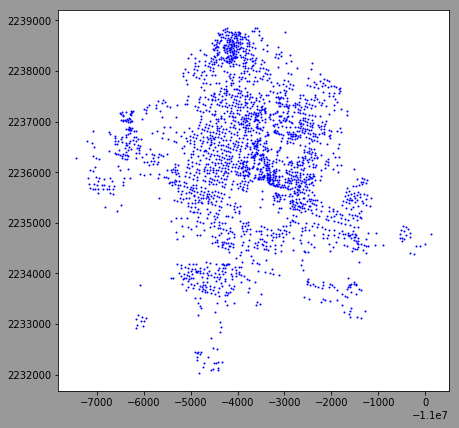

In [72]:
plt.figure(figsize = (7, 7), facecolor = '.6')
for i in range(len(rsd_MeanCtr)):
    plt.scatter(rsd_MeanCtr[i][0], rsd_MeanCtr[i][1], c = 'b', s = 1)

# Manually Calculate Geometric Mean (Abandoned)

237 points are ignored due to an unknown bug

In [235]:
def getArea(x,y):
    assert len(x) == len(y)
    result = 0
    for i in range(0, len(x)-1):
        result += (x[i]*y[i+1] - x[i+1]*y[i])
    return 0.5*result

In [236]:
rsd_forExport = []

# for i in range(len(rsd_raw)-237):
# rsd_raw = np.concatenate((rsd_raw[:2218], rsd_raw[2219:]), axis = 0)

for i in range(len(rsd_raw)-237):

# for i in range(len(rsd_raw)):
    area = getArea(rsd_raw[i][:,0],rsd_raw[i][:,1])
    
    rsd_forExport.append([])
    rsd_forExport[-1] = [
        # a: the a_th point in a shape
        (1/(6*area))*sum([ ((rsd_raw[i][a][0] + rsd_raw[i][a+1][0]) *
                  (rsd_raw[i][a][0] * rsd_raw[i][a+1][1] - rsd_raw[i][a][1] * rsd_raw[i][a+1][0])) 
                  for a in range(-1, len(rsd_raw[i])-1)
                ])
        ,
        (1/(6*area))*sum([ (rsd_raw[i][a][1] + rsd_raw[i][a+1][1])*
                  (rsd_raw[i][a][0] * rsd_raw[i][a+1][1] - rsd_raw[i][a][1]*rsd_raw[i][a+1][0])
                  for a in range(-1, len(rsd_raw[i])-1)
                ])
        ]


In [238]:
# add a new element array of all point coords to rsd
np.savetxt("rsd_array_GeometricCentroids.csv", rsd_forExport, delimiter=",")

## Plot the resultant centers

In [82]:
import matplotlib.pyplot as plt

rsd_ctr = np.genfromtxt('rsd_array_GeometricCentroids.csv', delimiter=',')

In [121]:
max(rsd_forExport)

[106.95834343042425, -21.73803013150109]

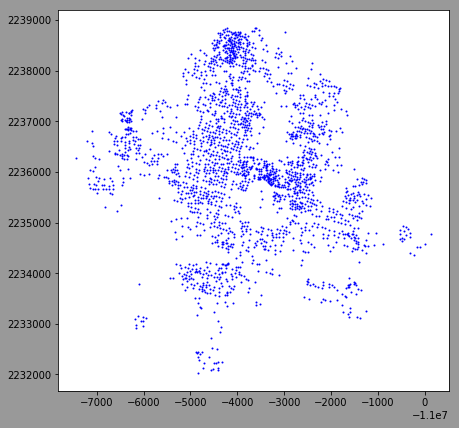

In [237]:
rsd_ctr = rsd_forExport

plt.figure(figsize = (7, 7), facecolor = '.6')
for i in range(len(rsd_ctr)):
    plt.scatter(rsd_ctr[i][0], rsd_ctr[i][1], c = 'b', s = 1)

In [230]:
for i in rsd_forExport[:][0]:
    if i == 0:
        print(i)

In [225]:
type(rsd_forExport)

list